## Predict TripAdvisor Rating

Try to solve first real case and create the first model using machine learning algorithms. For now, the task will be to properly prepare the data for training the model.


#### Which case are we solving?

Let's say we work for DS at TripAdvisor. One of the company's problems is dishonest restaurants that wind up their ratings. One way to find such restaurants is to build a model that predicts the restaurant rating. If the predictions of the model greatly differ from the actual result, then the restaurant may be playing unfairly and should be checked.

We will be working with a dataset containing information about 40,000 restaurants in Europe, and the model we will train will have to predict the rating of a restaurant from TripAdvisor, based on the data available in the dataset.

## 1. Importing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from datetime import datetime # for data

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 
import os

# Preprocessing Data
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # tool for creating and training a model
from sklearn import metrics # tools for assessing model accuracy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
#Setting the conditions for experiments.
#For reproducibility of the results, let's set: 
# - general parameter for generating random numbers
RANDOM_SEED = 42
# - current date
current_date = pd.to_datetime('02/12/2020')
# fix the version of the packages so that the experiments are reproducible:
!pip freeze > requirements.txt

### 1.2. Importing Data

In [ ]:
# data_directory = '/kaggle/input/sf-dst-restaurant-rating/
# dataset for training
# data_train = pd.read_csv(data_directory+'/main_task.csv')

# dataset for which we want predict the rating
# data_test = pd.read_csv(data_directory+'/kaggle_task.csv')

# sample_submission = pd.read_csv(data_directory+'/sample_submission.csv')

In [3]:
# data_directory = '/kaggle/input/sf-dst-restaurant-rating/
# dataset for training
data_train = pd.read_csv('main_task.csv')

# dataset for which we want predict the rating
data_test = pd.read_csv('kaggle_task.csv')

sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
# Checkin the dataset for training
data_train.info()
data_train.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
15431,id_823,Helsinki,"['Mexican', 'Southwestern', 'Gluten Free Optio...",824.0,3.0,$$ - $$$,212.0,"[['Nice Tex-Mex restaurant', 'Good Mexican sty...",/Restaurant_Review-g189934-d798087-Reviews-Can...,d798087
16590,id_7854,Madrid,"['German', 'European']",7861.0,3.0,$$ - $$$,83.0,"[['Dinner with a group of students', 'A beer h...",/Restaurant_Review-g187514-d2001857-Reviews-Kr...,d2001857
32876,id_7537,Madrid,NaN,7544.0,3.0,NaN,70.0,"[['Irish pub without Guinness!?', 'Below avera...",/Restaurant_Review-g187514-d2010714-Reviews-Th...,d2010714
24700,id_7173,London,"['Japanese', 'Sushi', 'Asian', 'Gluten Free Op...",7182.0,4.0,$$ - $$$,76.0,"[['Good food but a bit overpriced', 'Proper su...",/Restaurant_Review-g186338-d6437461-Reviews-Oh...,d6437461
21755,id_798,Bratislava,NaN,799.0,3.5,NaN,6.0,"[['Tasty food', 'Nice experience'], ['06/19/20...",/Restaurant_Review-g274924-d9844847-Reviews-Bo...,d9844847


In [5]:
# Merging the datasets.For the correct processing of features, we combine the train and test into one dataset
data_train['Sample'] = 1  # mark where we have train
data_test['Sample'] = 0  # mark where we have test
# in the test we do not have the Rating value, we must predict it, so for now we just fill it with zeros
data_test['Rating'] = 0
data = data_test.append(data_train, sort=False).reset_index(drop=True)

## 2. Cleaning and Prepping Data

In [6]:
# Checking the merged data
data.info()
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   Sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Sample,Rating
42234,id_2448,Madrid,['Spanish'],2450.0,$$ - $$$,12.0,"[[], []]",/Restaurant_Review-g187514-d10915666-Reviews-Q...,d10915666,1,5.0
24520,id_2528,Hamburg,"['Spanish', 'Latin', 'Vegetarian Friendly']",2533.0,$$ - $$$,69.0,"[['Ok restaurant for business diner', 'Meat, M...",/Restaurant_Review-g187331-d2339807-Reviews-La...,d2339807,1,3.0
13139,id_6189,Berlin,['Italian'],6191.0,NaN,5.0,"[[], []]",/Restaurant_Review-g187323-d2643409-Reviews-Va...,d2643409,1,4.0
23712,id_2929,Amsterdam,"['Brazilian', 'Latin', 'Spanish']",2938.0,$$ - $$$,18.0,"[['Best COXINHA ever', 'Food too salty'], ['08...",/Restaurant_Review-g188590-d9982451-Reviews-Tr...,d9982451,1,3.5
34112,id_8030,Madrid,['Spanish'],8037.0,$,35.0,[['Very friendly staff and good value for the....,/Restaurant_Review-g187514-d4606096-Reviews-Ca...,d4606096,1,3.0


In [7]:
# Checking the data
data['Cuisine Style'][1]

"['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']"

In [8]:
# Checking the data
data['Reviews'][1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

### 2.1. Preliminary Data Analysis

- **City** - the city where the restaurant is located. 
- **Cuisine Style** - features of the restaurant's cuisine (cuisine of a certain country or nation, vegetarian, etc.). 
- **Ranking** - the restaurant's rank relative to other restaurants in the city. 
- **Price Range** - price category of the restaurant (cheap, medium, expensive). 
- **Number of Reviews** - the total number of reviews for the restaurant. 
- **Reviews** - most recent restaurant reviews and the dates of these reviews. 
- **URL_TA** - the url of the restaurant on TripAdvisor.
- **ID_TA** - restaurant id on TripAdvisor.
- **Rating** - "bubble rating" of the restaurant on TripAdvisor. 

#### Remarks:

Should take attention to reviews, since bubble rating is defined as the average of ratings given by visitors in reviews.

The ranking variable is calculated based on the rating, so its proximity to the rating must also be significant.

The ranking is influenced by the latest reviews, so the date of the last review should probably be set separately.

Perhaps the  ranking depends on the city, it makes sense to create a function that reflects the relative position of the restaurant.

In [9]:
# Counting unique values
data.nunique(dropna = False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
Sample                   2
Rating                  10
dtype: int64

Categorical variables: City, Cuisine Style(not processed), Price Range, and Rating.

Continuous variables: Restaurant_id, Ranking, Number of Reviews, Restaurant id.

The city and cuisine style - are nominal categorical variables, since they don't have any internal order or sequence.

The price level and rating features are ordinal categorical variables. They have a internal sequence - from a cheap restaurant to an expensive one and from a low to a high rating.

In [10]:
# Checking for missing values
data.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
Sample                   0
Rating                   0
dtype: int64

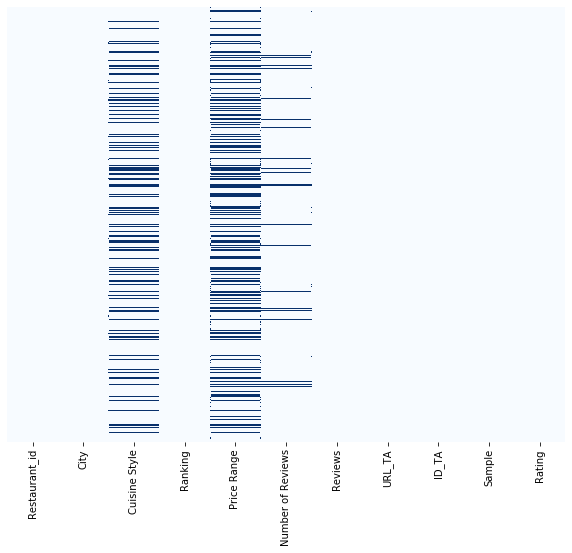

In [11]:
# Visualization
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

There are many missing values in the cuisine style, price range, and number of reviews columns, dont think we will delete them that may lead to problems with submitting the result.

### 2.2 Restaurant_id

In [12]:
# Counting values
data['Restaurant_id'].value_counts()

id_871      19
id_436      19
id_633      19
id_227      19
id_71       18
            ..
id_13853     1
id_11830     1
id_10404     1
id_14892     1
id_10921     1
Name: Restaurant_id, Length: 13094, dtype: int64

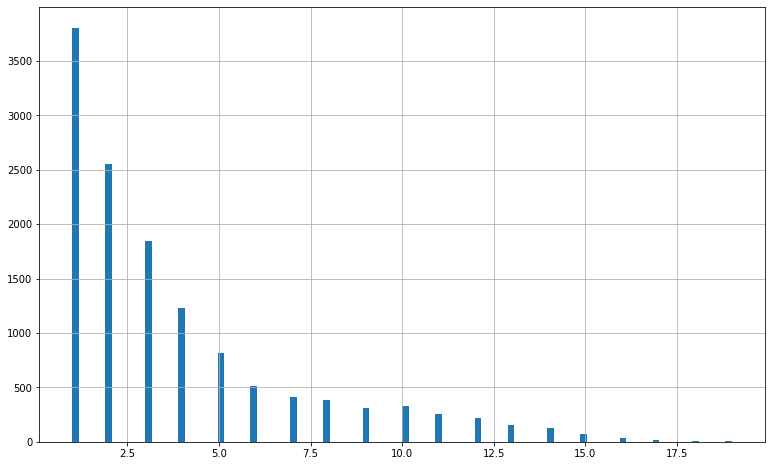

In [13]:
# Checking the frequency distribution / visualization
plt.rcParams['figure.figsize'] = (13,8)
data['Restaurant_id'].value_counts().hist(bins=100)

Significant part of the dataset have a non-unique ID, so the Restaurant_id column has no analytical value and can be deleted.

In [14]:
# Dropping the Restaurant_id column
data.drop(['Restaurant_id'], inplace = True, axis = 1)

### 2.3 City
**City** - the city where the restaurant is located. We can use this variable as a basis for creating additional features using external sources.)

In [15]:
# Counting values
data['City'].value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

In [16]:
# Counting unique cities
data['City'].nunique()

31

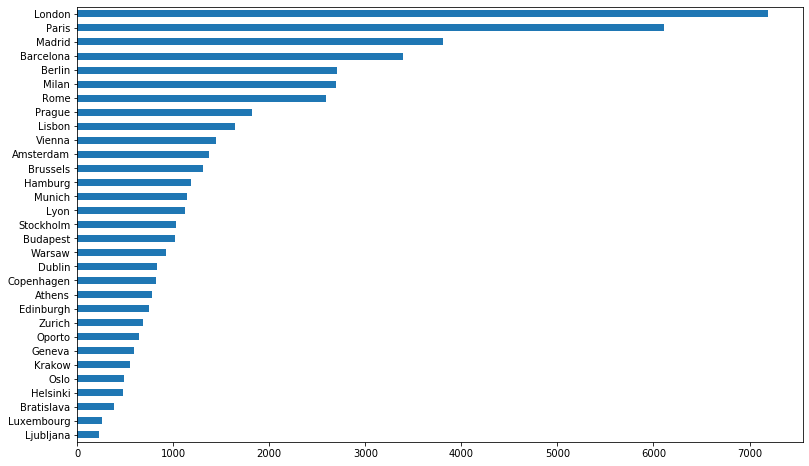

In [17]:
# Checking the frequency distribution
data['City'].value_counts(ascending=True).plot(kind='barh')

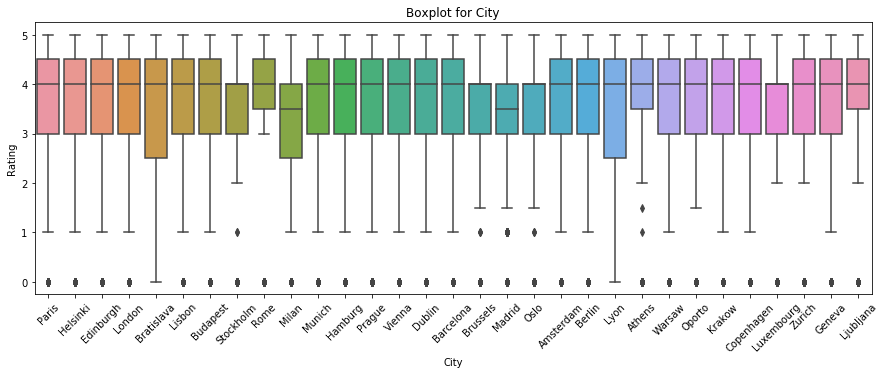

In [18]:
# Checking the Rating distribution by city
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x='City', y='Rating', data=data.loc[
    data.loc[:, 'City'].isin(data.loc[:, 'City'].value_counts().index[:])
], ax=ax)

plt.xticks(rotation=45)
ax.set_title('Boxplot for City')

plt.show()

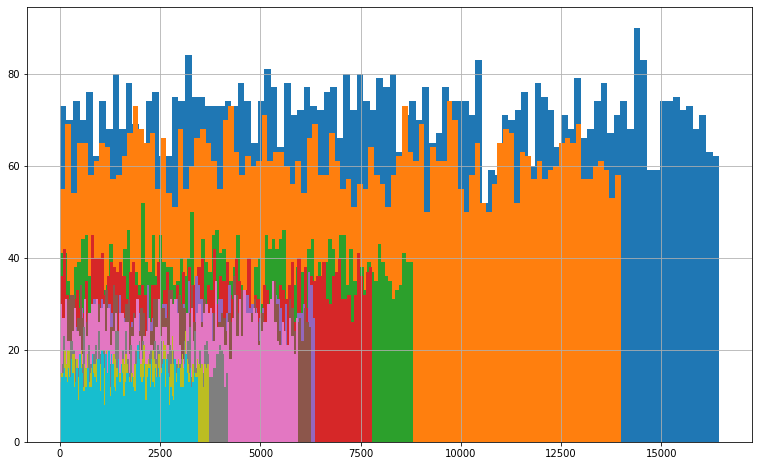

In [19]:
# Checking the Ranking distribution by city
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=100)
plt.show()

It seems that the rating and ranking are proportionally distributed between the cities. 

Ranking has a normal distribution, it is just that there are more restaurants in big cities, because of this we have a displacement.

Let's add information about the number of restaurants in the each city. We will get this information directly from TripAdvisor (City restaurant counts).

In [20]:
# Creating dictionary with number of restaurants in the city using TripAdvisor pages for restaurants
res_count = {
    'London': 19873,
    'Paris': 17075,
    'Madrid': 11114,
    'Barcelona': 9472,
    'Berlin': 6606,
    'Milan': 7422,
    'Rome': 10875,
    'Prague': 5394,
    'Lisbon': 4865,
    'Vienna': 4111,
    'Amsterdam': 3978,
    'Brussels': 3608,
    'Hamburg': 3276,
    'Munich': 3140,
    'Lyon': 2772,
    'Stockholm': 2982,
    'Budapest': 3060,
    'Warsaw': 3220,
    'Dublin': 2327,
    'Copenhagen': 2331,
    'Athens': 2542,
    'Edinburgh': 1883,
    'Zurich': 1864,
    'Oporto': 1983,
    'Geneva': 1698,
    'Krakow': 1750,
    'Oslo': 1260,
    'Helsinki': 1555,
    'Bratislava': 1263,
    'Luxembourg': 737,
    'Ljubljana': 600
}

In [21]:
# Mapping the dataset with dictionary
data['Restaurants Count'] = data['City'].map(res_count)
data['Restaurants Count']

0        17075
1         1555
2         1883
3        19873
4         1263
         ...  
49995     7422
49996    17075
49997     2982
49998     3220
49999     7422
Name: Restaurants Count, Length: 50000, dtype: int64

In [22]:
# Creating Capital_City
list_Of_NotCapitalCity = ['Barcelona', 'Milan', 'Hamburg', 'Munich',
                          'Lyon', 'Zurich', 'Oporto', 'Geneva', 'Krakow']

data['Capital_City'] = data['City'].apply(
    lambda x: 0.0 if x in list_Of_NotCapitalCity else 1.0)

In [23]:
# Сity_population dictionary , creating a new feature
dict_Сity_population = {
    'London': 8908,
    'Paris': 2206,
    'Madrid': 3223,
    'Barcelona': 1620,
    'Berlin': 6010,
    'Milan': 1366,
    'Rome': 2872,
    'Prague': 1308,
    'Lisbon': 506,
    'Vienna': 1888,
    'Amsterdam': 860,
    'Brussels': 179,
    'Hamburg': 1841,
    'Munich': 1457,
    'Lyon': 506,
    'Stockholm': 961,
    'Budapest': 1752,
    'Warsaw': 1764,
    'Dublin': 553,
    'Copenhagen': 616,
    'Athens': 665,
    'Edinburgh': 513,
    'Zurich': 415,
    'Oporto': 240,
    'Geneva': 201,
    'Krakow': 769,
    'Oslo': 681,
    'Helsinki': 643,
    'Bratislava': 426,
    'Luxembourg': 119,
    'Ljubljana': 284
}
data['Сity_population'] = data.apply(
    lambda row: dict_Сity_population[row['City']], axis=1)

In [24]:
# Converting feature to dummy variables
data = pd.get_dummies(data, columns=['City',], dummy_na=True)
# data.sample(5)

### 2.4 Cuisine Style
- **Cuisine Style** - features of the restaurant's cuisine (cuisine of a certain country or nation, vegetarian, etc.). This variable needs to be cleaned and create a new features

In [25]:
# Counting values to see how many we have
data['Cuisine Style'].value_counts()

['Italian']                                                                                                                1332
['French']                                                                                                                 1019
['Spanish']                                                                                                                 860
['French', 'European']                                                                                                      503
['Cafe']                                                                                                                    500
                                                                                                                           ... 
['American', 'Bar', 'Barbecue', 'Central American', 'International']                                                          1
['Italian', 'International', 'Mediterranean', 'Contemporary', 'European', 'Vegetarian Friendly', 'Gluten

We will record the missing values separately 

In [26]:
# Creating binary variable for missing values
data['Cuisine Style NAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

Replacing missing values with 'No Cuisine Provided'.

In [27]:
# Filling the missing values
data['Cuisine Style'] = data['Cuisine Style'].fillna('no cuisine provided')

Now let's clear the variable and convert it into a series of lists. This way it will be easier for us to extract data and create new features later.

In [28]:
# Lowering the cases
data['Cuisine Style'] = data['Cuisine Style'].str.lower() 
data['Cuisine Style']

0                                           ['bar', 'pub']
1        ['european', 'scandinavian', 'gluten free opti...
2                                  ['vegetarian friendly']
3        ['italian', 'mediterranean', 'european', 'vege...
4        ['italian', 'mediterranean', 'european', 'seaf...
                               ...                        
49995    ['italian', 'vegetarian friendly', 'vegan opti...
49996    ['french', 'american', 'bar', 'european', 'veg...
49997                                ['japanese', 'sushi']
49998    ['polish', 'european', 'eastern european', 'ce...
49999                                          ['spanish']
Name: Cuisine Style, Length: 50000, dtype: object

In [29]:
# Converting string values to lists
def cuisines_to_list(string):
    string = string.replace('[', '')
    string = string.replace(']', '')
    string = string.replace("'", '')
    return string.split(', ')

data['Cuisine Style'] = data['Cuisine Style'].apply(cuisines_to_list)

In [30]:
# Checking the value type
type(data['Cuisine Style'][0])

list

Now let's see how many unique cuisine styles we have for each restaraunt and overall.

In [31]:
# Creating new features
data['Number of Cuisines'] = data['Cuisine Style'].apply(lambda x: len(x))
data['Number of Cuisines'].value_counts()

1     20744
2      7794
3      6638
4      5948
5      4482
6      2611
7      1294
8       363
9        93
10       26
11        4
21        1
15        1
13        1
Name: Number of Cuisines, dtype: int64

In [32]:
# Creating a set of unique cuisine styles
cuisines_set = set()

for restaraunt_cuisines in data['Cuisine Style']:
    for cuisine in restaraunt_cuisines:
        cuisines_set.add(cuisine)
        
len(cuisines_set)

126

Let's see how common each of the styles is in our dataset

In [33]:
# Counting cuisine styles
cuisines_counter = dict.fromkeys(cuisines_set, 0)

for cuisine in cuisines_set:
    for restaraunt_cuisines in data['Cuisine Style']:
        if cuisine in restaraunt_cuisines:
            cuisines_counter[cuisine] += 1
            
cuisines_counter = pd.Series(cuisines_counter)
cuisines_counter.sort_values(ascending=False)[0:20]

vegetarian friendly    14021
european               12561
no cuisine provided    11590
mediterranean           7820
italian                 7433
vegan options           5684
gluten free options     5185
bar                     4094
french                  3970
asian                   3786
pizza                   3502
spanish                 3456
pub                     3058
cafe                    2883
fast food               2122
british                 1992
international           1966
seafood                 1878
japanese                1860
central european        1727
dtype: int64

Finally, we will use dummy variables to encode cuisine styles.

In [34]:
# Converting a feature to dummy variables
data_cuisines = pd.get_dummies(data['Cuisine Style'].apply(pd.Series).stack()).sum(level=0)
data = pd.merge(data, data_cuisines, left_index=True, right_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 172 entries, Cuisine Style to yunnan
dtypes: float64(4), int64(4), object(5), uint8(159)
memory usage: 12.5+ MB


### 2.5 Ranking
- **Ranking** - the restaurant's rank relative to other restaurants in the city. If there are 100 restaurants in a city, the worst restaurant will have a rank of 100, and the best one will have a rank of 1. Because of this, the variable value may be duplicated. We should check a relative ranking.

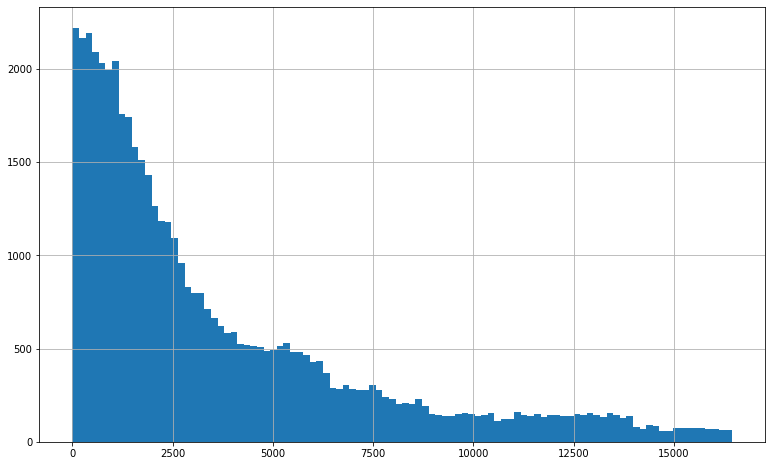

In [35]:
# Checking the Ranking distribution
data['Ranking'].hist(bins=100)

As mentioned above, the rating depends on the city, so it makes sense to create a feature that reflects the relative position of the restaurant.

In [36]:
# Creating a new feature
data['Relative Ranking'] = data['Ranking'] / data['Restaurants Count']
data['Relative Ranking']

0        0.759180
1        0.068167
2        0.430165
3        0.083983
4        0.029295
           ...   
49995    0.067367
49996    0.371362
49997    0.553991
49998    0.199068
49999    0.650364
Name: Relative Ranking, Length: 50000, dtype: float64

### 2.6. Price Range
- **Price Range** - price category of the restaurant (cheap, medium, expensive). This feature needs to be converted to digital form? its a consistent feature

In [37]:
# Counting values
data['Price Range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [38]:
# Creating a binary variable for missing values
data['Price Range NAN'] = pd.isna(data['Price Range']).astype('uint8')

In [39]:
# Checking the URLs of restaraunts with no price range
data.query('`Price Range NAN` == 1')['URL_TA'].tolist()[0:11]

['/Restaurant_Review-g274887-d8286886-Reviews-Beer_N_Scooter-Budapest_Central_Hungary.html',
 '/Restaurant_Review-g189934-d12947542-Reviews-Bistro_Gimis-Helsinki_Uusimaa.html',
 '/Restaurant_Review-g189852-d12716384-Reviews-Il_Molo-Stockholm.html',
 '/Restaurant_Review-g187791-d7818546-Reviews-Jerry_Thomas_Speakeasy-Rome_Lazio.html',
 '/Restaurant_Review-g187331-d1344523-Reviews-Il_Cammino-Hamburg.html',
 '/Restaurant_Review-g190454-d8435085-Reviews-Angkor_Club-Vienna.html',
 '/Restaurant_Review-g187497-d8334752-Reviews-Restaurante_Laumon-Barcelona_Catalonia.html',
 '/Restaurant_Review-g187514-d13202032-Reviews-Wan-Madrid.html',
 '/Restaurant_Review-g187497-d5795143-Reviews-La_Bona_Taula_de_Llica-Barcelona_Catalonia.html',
 '/Restaurant_Review-g187147-d11953078-Reviews-Bistrot_Wattignies-Paris_Ile_de_France.html',
 '/Restaurant_Review-g186338-d13234520-Reviews-The_Granary_Brasserie-London_England.html']

After we had a look at the data, we see a lot of average-priced restaurants. We will assume that this is the case and replace the missing values with the average price category. If our assumption is incorrect, we can always replace the data using the Price Range NAN column.

In [40]:
# Filling the missing values
data['Price Range'] = data['Price Range'].fillna('$$ - $$$')

In [41]:
# Replacing the object values with numeric values using dictionary replacement
price_transform_dict = {'$':1,'$$ - $$$':2,'$$$$':3}
data['Price Range'] = data['Price Range'].map(lambda x: price_transform_dict.get(x,x))

data['Price Range'].value_counts()

2    40402
1     7816
3     1782
Name: Price Range, dtype: int64

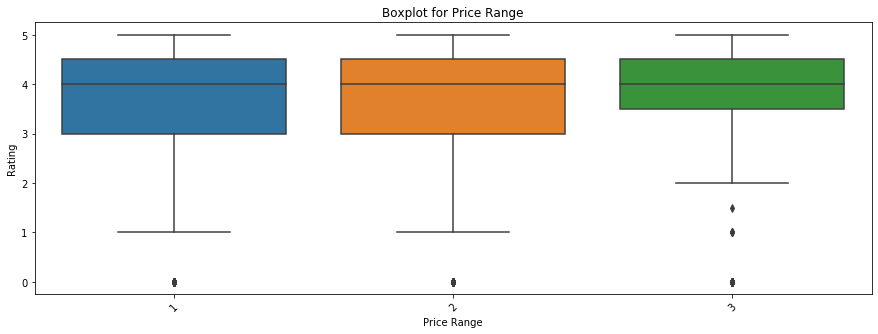

In [42]:
# Checking the Rating distribution by price range
fig, ax = plt.subplots(figsize = (15, 5))

sns.boxplot(x='Price Range', y='Rating',data=data.loc[
    data.loc[:, 'Price Range'].isin(data.loc[:, 'Price Range'].value_counts().index[:])
],ax=ax)

plt.xticks(rotation=45)
ax.set_title('Boxplot for Price Range')

plt.show()

It seems that rating has no effect on price category. The medians of all price categories are the same, but expensive restaurants have less amount of bad ratings. Could be this is a psychological perception and attitude.

In [43]:
# Counting values
data['Number of Reviews'].value_counts(dropna=False)

NaN       3200
2.0       2403
3.0       2042
4.0       1707
5.0       1471
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: Number of Reviews, Length: 1574, dtype: int64

In [44]:
# Creating a binary variable for missing values
data['Number of Reviews NAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

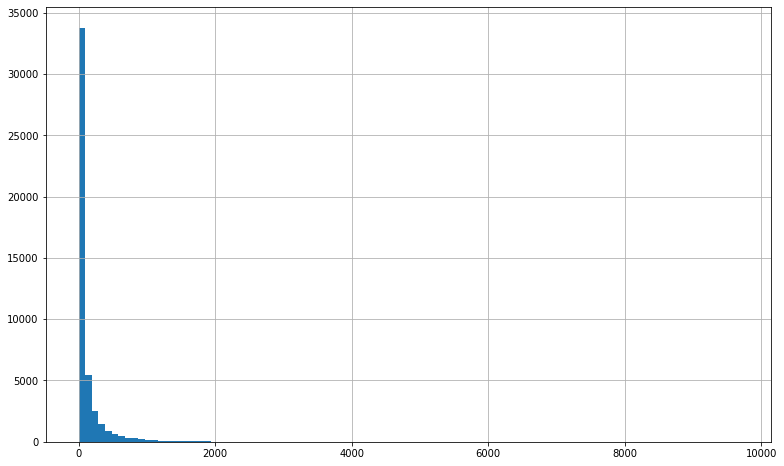

In [45]:
# Checking the frequency distribution
data['Number of Reviews'].hist(bins=100)

We will go deeper into the data on the number of reviews, using the link to the restaurant's page, take as example few, we will not go to the each

In [46]:
# Checking the URLs of restaraunts with no number of reviews
data.query('`Number of Reviews NAN` == 1')['URL_TA'].tolist()[0:11]

['/Restaurant_Review-g274887-d8286886-Reviews-Beer_N_Scooter-Budapest_Central_Hungary.html',
 '/Restaurant_Review-g187514-d13202032-Reviews-Wan-Madrid.html',
 '/Restaurant_Review-g274707-d7124128-Reviews-Chocobamba-Prague_Bohemia.html',
 '/Restaurant_Review-g274707-d12032989-Reviews-Cafe_Nova_doba-Prague_Bohemia.html',
 '/Restaurant_Review-g187497-d10088997-Reviews-Nasca-Barcelona_Catalonia.html',
 '/Restaurant_Review-g1166685-d12644341-Reviews-Otentik_City-Saint_Priest_Lyon_Rhone_Auvergne_Rhone_Alpes.html',
 '/Restaurant_Review-g187497-d12204689-Reviews-Sant_Tomassino_Gracia-Barcelona_Catalonia.html',
 '/Restaurant_Review-g187323-d4802788-Reviews-Boccato_DI_Cardina-Berlin.html',
 '/Restaurant_Review-g187497-d12530776-Reviews-Casa_NOVA-Barcelona_Catalonia.html',
 '/Restaurant_Review-g188590-d753088-Reviews-Banco_Solo-Amsterdam_North_Holland_Province.html',
 '/Restaurant_Review-g274887-d12953643-Reviews-Egyetem_Restaurant-Budapest_Central_Hungary.html']

After browsing the links, it becomes clear that a visible part of them are brand new restaurants or little-known. Perhaps that at the time of collecting the dataset, these restaurants did not have reviews and fill in the gaps in this column with zeros.

In [47]:
# Filling the missing values
data['Number of Reviews'] = data['Number of Reviews'].fillna(0)

In [48]:
# Creating a new feature
data['Reviews to Ranking Ratio'] = data['Number of Reviews'] / data['Ranking']
data['Reviews to Ranking Ratio']

0        0.000309
1        0.915094
2        0.034568
3        0.121031
4        4.378378
           ...   
49995    0.158000
49996    0.085475
49997    0.002421
49998    0.109204
49999    0.053864
Name: Reviews to Ranking Ratio, Length: 50000, dtype: float64

### 2.8 Reviews
- **Reviews** - most recent restaurant reviews and the dates of these reviews. From this variable, we can extract the reviews and dates. The rating in reviews (which we do not have in the dataset) directly affects the rating of the restaurant. Dates can be used as a reference for creating new ones.

In [49]:
# Checking the data
data['Reviews'].head(20)

0                                              [[], []]
1     [['Very good reviews!', 'Fine dining in Hakani...
2     [['Better than the Links', 'Ivy Black'], ['12/...
3     [['Most exquisite', 'Delicious and authentic']...
4     [['Always the best in bratislava', 'Very good ...
5     [['Lunch Break', 'Good to Quick Bite'], ['09/0...
6                                              [[], []]
7                                              [[], []]
8     [['Big group supper', 'Good food but very slow...
9     [['Good food', 'Good pizza'], ['12/02/2017', '...
10    [['Very pretentious, but drinks are top notch'...
11    [['GREAT APERITIVO WITH STYLE', 'Disappointing...
12    [['You always feel very Welcome at this cozy.....
13    [['Surprisingly good pizza', 'Yummy'], ['09/28...
14    [['Good food, beer, value and service', 'Eat u...
15    [['Very nice food and staff', 'Lovely service ...
16    [['truly Neapolitan pizza, new/slick location'...
17    [['Quite a decent pub', 'in the middle of 

In [50]:
# Cleaning and processing Reviews
def cuisines_to_list(string):
        string = str(string).replace('[', '')
        string = str(string).replace(']', '')
        string = str(string).replace("'", '')
        return string.split(', ')
data['Reviews'] = data['Reviews'].apply(cuisines_to_list)

In [51]:
#Replace the gaps in Reviews with "[[], []]". We do not make a separate column, because. total 2 NAN values 
data['Reviews'].fillna('[[], []]',inplace = True)

After quick look over the dataset, you will find the following good words: 'good', 'best', 'nice', 'better', 'amazing', 'excellent', 'great', 'wonderful' ect. Let's add them to the check for good comments and same for bad comments

Will count the difference in days only in a string where there are 2 dates. It makes no sense to count the difference less than 2.

In [52]:
# Establishing lists of words

def filter_good_comment(line):
    key_words = ['great', 'good', 'nice', 'best', 'excellent', 'delicious',
                 'lovely', 'friendly', 'tasty', 'amazing', 'fantastic',
                 'perfect', 'wonderful', 'gem', 'fresh', 'decent', 'cozy',
                 'pleasant', 'love', 'awesome', 'beautiful', 'yummy',
                 'fabulous', 'superb', 'fine', 'brilliant', 'cute', 'super'
                 'favourite', 'enjoyable', 'favorite', 'outstanding',
                 'pretty', 'affordable', 'charming', 'delightful',
                 'unique', 'incredible', 'solid', 'exceptional']
    counter = 0
    for word in key_words:
        if word in str(line).lower(): # Lowering the cases
            counter += 1
    return counter


def filter_bad_comment(line):
    key_words = ['bad', 'poor', 'worst', 'terrible', 'disappointing',
                 'overpriced', 'rude', 'avoid', 'awful', 'disappointed',
                 'horrible', 'mediocre', 'cold']
    counter = 0
    for word in key_words:
        if word in str(line).lower():
            counter += 1
    return counter

# Difference in days between reviews

def get_date_difference(line):
    if len(line) != 2:
        return 0
    date1 = datetime.strptime(line[0], '%m/%d/%Y')
    date2 = datetime.strptime(line[1], '%m/%d/%Y')

In [53]:
# Comment dates
data['Date_of_Reviews'] = data['Reviews'].str.findall('\d+/\d+/\d+')

In [54]:
# Number of dates in reviews
data['Date_of_Reviews'] = data['Date_of_Reviews'].astype(str)
data['Date_of_Reviews'].apply(lambda x: len(x)).value_counts() 

3    50000
Name: Date_of_Reviews, dtype: int64

Let's create 3 new features: "Number of good comments in reviews" , "Number of good comments in reviews" and "Difference in days between reviews".

In [55]:
data['Good_Comments'] = data.Reviews.apply(filter_good_comment)
data['Bad_Comments'] = data.Reviews.apply(filter_bad_comment)
data['Date_Difference'] = data['Date_of_Reviews'].apply(get_date_difference)

### 2.9 URL_TA
- **URL_TA** - the url of the restaurant on TripAdvisor.

In [56]:
# Checking the data
data['URL_TA'][1]

'/Restaurant_Review-g189934-d6674944-Reviews-Ravintola_Kolmon3n-Helsinki_Uusimaa.html'

Some of TripAdvisor links is not valid any more and I dont really know how to do parsing, not much information we could get from there at the moment so we will delete this column.

In [57]:
# Dropping the URL_TA column.
data.drop(['URL_TA'], inplace = True, axis = 1)

### 2.10 ID_TA
- **ID_TA** - restaurant id on TripAdvisor.

In [58]:
# Counting values
pd.set_option('display.min_rows', 10)
data['ID_TA'].value_counts()

d4914988     2
d11921719    2
d1235635     2
d1568045     2
d5617412     2
            ..
d12843306    1
d11933144    1
d8474890     1
d1972167     1
d12129922    1
Name: ID_TA, Length: 49963, dtype: int64

Some IDs are duplicated. We will try to figure it out.

In [59]:
# Checking the data
data[data['ID_TA'] == 'd4600226']

,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,ID_TA,Sample,Rating,Restaurants Count,Capital_City,...,xinjiang,yunnan,Relative Ranking,Price Range NAN,Number of Reviews NAN,Reviews to Ranking Ratio,Date_of_Reviews,Good_Comments,Bad_Comments,Date_Difference
10147,[spanish],4112.0,2,2.0,"[, ]",d4600226,1,5.0,11114,1.0,...,0,0,0.369984,1,0,0.000486,nan,0,0,0
19446,[spanish],4106.0,2,2.0,"[, ]",d4600226,1,5.0,11114,1.0,...,0,0,0.369444,1,0,0.000487,nan,0,0,0


It's obvious we're dealing with duplicates, we will check how many of them there are.

In [60]:
# Counting duplicates
data['ID_TA'].duplicated().value_counts()

False    49963
True        37
Name: ID_TA, dtype: int64

There are a couple of missing values in the Reviews feature, but deleting them leads to problems with submitting the result.

### 2.11 Rating
- **Rating** - "bubble rating" of the restaurant on TripAdvisor. 
Tripadvisor bubble rating is a summary of ratings from guests who reviewed restaurant 
 
Bubble rating is displayed on a 1-5 scale, where 3 is average and 5 is excellent. 

Since the rating is a multiple of 0.5, we may set an additional function to process our forecast to avoid results that are not multiples of 0.5.
https://www.tripadvisor.com/TripAdvisorInsights/w810

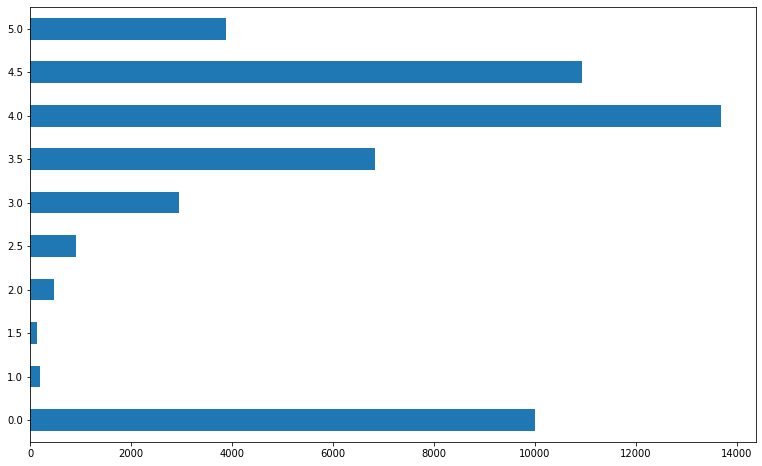

In [61]:
# Checking the frequency distribution
plt.rcParams['figure.figsize'] = (13,8)
data['Rating'].value_counts(ascending=True).sort_index().plot(kind='barh')

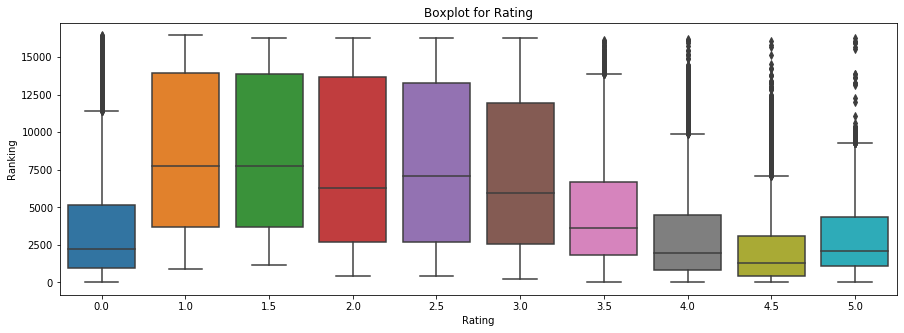

In [62]:
# Checking the Ranking distribution by rating
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = 'Rating', 
            y = 'Ranking', 
            data = data.loc[data.loc[:, 'Rating'].isin(
                data.loc[:, 'Rating'].value_counts().index[:]
            )],ax=ax)
ax.set_title('Boxplot for Rating')
plt.show()

According to this chart, restaurants with a high rating (4+) are usually located in the first 5000 ranking places. Another interesting detail that position and shape of the testing dataset is close to the boxplots of 3.5-4 rating. Thus, we can assume that this rating will be observed on average in the testing dataset.

In [63]:
# Using the correlation matrix (in absolute value)
data.corr().abs().sort_values(by='Rating', ascending=False)

,Ranking,Price Range,Number of Reviews,Sample,Rating,Restaurants Count,Capital_City,Сity_population,City_Amsterdam,City_Athens,...,wine bar,xinjiang,yunnan,Relative Ranking,Price Range NAN,Number of Reviews NAN,Reviews to Ranking Ratio,Good_Comments,Bad_Comments,Date_Difference
Rating,0.109897,0.012176,0.011006,0.936543,1.000000,0.011737,0.010620,0.002407,0.007447,0.016852,...,0.017776,0.002112,0.004430,0.171992,0.020519,0.000631,0.017618,0.055139,0.074935,NaN
Sample,0.006271,0.003419,0.002688,1.000000,0.936543,0.005031,0.004400,0.002160,0.003550,0.002912,...,0.001752,0.002236,0.004744,0.001316,0.000294,0.003473,0.004756,0.002243,0.002786,NaN
Relative Ranking,0.569755,0.034201,0.408267,0.001316,0.171992,0.013437,0.031722,0.024340,0.003144,0.030667,...,0.072512,0.000584,0.007748,1.000000,0.470189,0.207579,0.080047,0.350463,0.182422,NaN
Ranking,1.000000,0.026334,0.223198,0.006271,0.109897,0.702276,0.202905,0.547372,0.094100,0.094479,...,0.041328,0.003277,0.004805,0.569755,0.233946,0.094831,0.047729,0.182774,0.132058,NaN
Bad_Comments,0.132058,0.002778,0.027554,0.002786,0.074935,0.018300,0.011827,0.024002,0.011150,0.014788,...,0.015542,0.001111,0.001571,0.182422,0.016969,0.046899,0.010919,0.093040,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grill,0.013882,0.007080,0.021886,0.001630,0.000209,0.003942,0.010298,0.017119,0.024474,0.012347,...,0.007146,0.000500,0.000707,0.026712,0.057549,0.009984,0.003003,0.015540,0.001736,NaN
polynesian,0.004949,0.009320,0.001436,0.003162,0.000206,0.006558,0.011244,0.003931,0.001062,0.000794,...,0.000845,0.000028,0.000040,0.000219,0.002030,0.001654,0.000176,0.003671,0.001571,NaN
City_Lisbon,0.089639,0.025073,0.001748,0.004931,0.000081,0.121864,0.103810,0.154727,0.031001,0.023173,...,0.010339,0.000825,0.001167,0.016034,0.002323,0.002560,0.000807,0.003823,0.000020,NaN
City_nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The correlation matrix tells us that the most strongly associated features with the rating are relative ranking, bad reviews content and number of cuisines.

### 2.12. Dropping non-numerical data

In [64]:
# Checking the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 179 entries, Cuisine Style to Date_Difference
dtypes: float64(6), int64(8), object(4), uint8(161)
memory usage: 14.5+ MB


In [65]:
# Dropping object columns
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [66]:
# Checking the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 175 entries, Ranking to Date_Difference
dtypes: float64(6), int64(8), uint8(161)
memory usage: 13.0 MB


# 3. Data Preprocessing

Now, for convenience and code reproducibility, let's wrap all the processing in one big function.

In [67]:
# data_directory = '/kaggle/input/sf-dst-restaurant-rating/
# dataset for training
df_train = pd.read_csv('main_task.csv')

# dataset for which we want predict the rating
df_test = pd.read_csv('kaggle_task.csv')

sample_submission = pd.read_csv('sample_submission.csv')

In [68]:
# Merging the datasets.For the correct processing of features, we combine the train and test into one dataset
df_train['Sample'] = 1  # mark where we have train
df_test['Sample'] = 0  # mark where we have test

# in the test we do not have the Rating value, we must predict it, so for now we just fill it with zeros
df_test['Rating'] = 0
data = data_test.append(data_train, sort=False).reset_index(drop=True)

In [69]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''

    df_output = df_input.copy()

    ########################## 1. Предобработка ##############################################################
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id', 'ID_TA', ], axis=1, inplace=True)

    ############################################## CITY ######################################################
    # Creating dictionary with number of restaurants in the city using TripAdvisor pages for restaurants
    res_count = {
        'London': 19873,
        'Paris': 17075,
        'Madrid': 11114,
        'Barcelona': 9472,
        'Berlin': 6606,
        'Milan': 7422,
        'Rome': 10875,
        'Prague': 5394,
        'Lisbon': 4865,
        'Vienna': 4111,
        'Amsterdam': 3978,
        'Brussels': 3608,
        'Hamburg': 3276,
        'Munich': 3140,
        'Lyon': 2772,
        'Stockholm': 2982,
        'Budapest': 3060,
        'Warsaw': 3220,
        'Dublin': 2327,
        'Copenhagen': 2331,
        'Athens': 2542,
        'Edinburgh': 1883,
        'Zurich': 1864,
        'Oporto': 1983,
        'Geneva': 1698,
        'Krakow': 1750,
        'Oslo': 1260,
        'Helsinki': 1555,
        'Bratislava': 1263,
        'Luxembourg': 737,
        'Ljubljana': 600
    }

    # Mapping the dataset with dictionary.
    df_output['Restaurants Count'] = df_output['City'].map(res_count)

    # Creating Capital_City
    list_Of_NotCapitalCity = ['Barcelona', 'Milan', 'Hamburg', 'Munich',
                              'Lyon', 'Zurich', 'Oporto', 'Geneva', 'Krakow']

    df_output['Capital_City'] = df_output['City'].apply(
        lambda x: 0.0 if x in list_Of_NotCapitalCity else 1.0)

    # Сity_population dictionary , creating a new feature
    dict_Сity_population = {
        'London': 8908,
        'Paris': 2206,
        'Madrid': 3223,
        'Barcelona': 1620,
        'Berlin': 6010,
        'Milan': 1366,
        'Rome': 2872,
        'Prague': 1308,
        'Lisbon': 506,
        'Vienna': 1888,
        'Amsterdam': 860,
        'Brussels': 179,
        'Hamburg': 1841,
        'Munich': 1457,
        'Lyon': 506,
        'Stockholm': 961,
        'Budapest': 1752,
        'Warsaw': 1764,
        'Dublin': 553,
        'Copenhagen': 616,
        'Athens': 665,
        'Edinburgh': 513,
        'Zurich': 415,
        'Oporto': 240,
        'Geneva': 201,
        'Krakow': 769,
        'Oslo': 681,
        'Helsinki': 643,
        'Bratislava': 426,
        'Luxembourg': 119,
        'Ljubljana': 284
    }
    df_output['Сity_population'] = df_output.apply(
        lambda row: dict_Сity_population[row['City']], axis=1)

    # Converting feature to dummy variables
    df_output = pd.get_dummies(df_output, columns=['City', ], dummy_na=True)

    ############################################## CUISINE ###################################################

    # Creating binary variable for missing values
    df_output['Cuisine Style NAN'] = pd.isna(df_output['Cuisine Style']).astype('uint8')
    
    # Filling the missing values
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna('no cuisine provided')
    
    # Lowering the cases
    df_output['Cuisine Style'] = df_output['Cuisine Style'].str.lower() 
    
    # Converting string values to lists
    def cuisines_to_list(string):
        string = string.replace('[', '')
        string = string.replace(']', '')
        string = string.replace("'", '')
        return string.split(', ')

    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(cuisines_to_list)
    
    # Creating new features
    df_output['Number of Cuisines'] = df_output['Cuisine Style'].apply(lambda x: len(x))
    
    # Creating a set of unique cuisine styles
    cuisines_set = set()

    for restaraunt_cuisines in df_output['Cuisine Style']:
        for cuisine in restaraunt_cuisines:
            cuisines_set.add(cuisine)
            
    # Counting cuisine styles
    cuisines_counter = dict.fromkeys(cuisines_set, 0)

    for cuisine in cuisines_set:
        for restaraunt_cuisines in df_output['Cuisine Style']:
            if cuisine in restaraunt_cuisines:
                cuisines_counter[cuisine] += 1
            
    cuisines_counter = pd.Series(cuisines_counter)
    
    # Converting a feature to dummy variables
    data_cuisines = pd.get_dummies(df_output['Cuisine Style'].apply(pd.Series).stack()).sum(level=0)
    df_output = pd.merge(df_output, data_cuisines, left_index=True, right_index=True)
     

    
    ############################################### RANKING ######################################################
    # Creating a new feature.
    df_output['Relative Ranking'] = df_output['Ranking'] / \
        df_output['Restaurants Count']

    ############################################# PRICE RANGE #####################################################

    # Creating a binary variable for missing values.
    df_output['Price Range NAN'] = pd.isna(
        df_output['Price Range']).astype('uint8')

    # Filling the missing values.
    df_output['Price Range'] = df_output['Price Range'].fillna('$$ - $$$')

    # Replacing the object values with numeric values
    price_transform_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
    df_output['Price Range'] = df_output['Price Range'].map(
        lambda x: price_transform_dict.get(x, x))

    ############################################ NUMBER OF REVIEWS ################################################
    # Creating a binary variable for missing values.
    df_output['Number of Reviews NAN'] = pd.isna(
        df_output['Number of Reviews']).astype('uint8')

    # Filling the missing values.
    df_output['Number of Reviews'] = df_output['Number of Reviews'].fillna(
        0)

    # Creating a new feature.
    df_output['Reviews to Ranking Ratio'] = df_output['Number of Reviews'] / \
        df_output['Ranking']

    ################################################## REVIEWS ####################################################
    # Cleaning and processing Reviews
    def cuisines_to_list(string):
            string = str(string).replace('[', '')
            string = str(string).replace(']', '')
            string = str(string).replace("'", '')
            return string.split(', ')
    df_output['Reviews'] = df_output['Reviews'].apply(cuisines_to_list)
    
    #Replace the gaps in Reviews with "[[], []]" 
    df_output['Reviews'].fillna('[[], []]',inplace = True)
    
    # Establishing lists of words

    def filter_good_comment(line):
        key_words = ['great', 'good', 'nice', 'best', 'excellent', 'delicious',
                     'lovely', 'friendly', 'tasty', 'amazing', 'fantastic',
                     'perfect', 'wonderful', 'gem', 'fresh', 'decent', 'cozy',
                     'pleasant', 'love', 'awesome', 'beautiful', 'yummy',
                     'fabulous', 'superb', 'fine', 'brilliant', 'cute', 'super'
                     'favourite', 'enjoyable', 'favorite', 'outstanding',
                     'pretty', 'affordable', 'charming', 'delightful',
                     'unique', 'incredible', 'solid', 'exceptional']
        counter = 0
        for word in key_words:
            if word in str(line).lower():
                counter += 1
        return counter
 
    def filter_bad_comment(line):
        key_words = ['bad', 'poor', 'worst', 'terrible', 'disappointing',
                     'overpriced', 'rude', 'avoid', 'awful', 'disappointed',
                     'horrible', 'mediocre', 'cold']
        counter = 0
        for word in key_words:
            if word in str(line).lower():
                counter += 1
        return counter

    # Difference in days between reviews
    def get_date_difference(line):
        if len(line) != 2:
            return 0
        date1 = datetime.strptime(line[0], '%m/%d/%Y')
        date2 = datetime.strptime(line[1], '%m/%d/%Y')
        
    # Comment dates
    df_output['Date_of_Reviews'] = df_output['Reviews'].str.findall('\d+/\d+/\d+')
    
    # Number of dates in reviews
    df_output['Date_of_Reviews'] = df_output['Date_of_Reviews'].astype(str)

    df_output['Date_of_Reviews'].apply(lambda x: len(x)).value_counts() 
    
    # create 3 new features
    df_output['Good_Comments'] = df_output.Reviews.apply(filter_good_comment)
    df_output['Bad_Comments'] = df_output.Reviews.apply(filter_bad_comment)
    df_output['Date_Difference'] = df_output['Date_of_Reviews'].apply(get_date_difference)
   
    ########################################## 5. Clean ####################################################
    # Dropping object columns; the model based on features with dtypes "object" will not be trained, just select them and delete
    object_columns = [
        s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis=1, inplace=True)

    return df_output

Run and check 

In [70]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,Sample,Rating,Restaurants Count,Capital_City,Сity_population,City_Amsterdam,City_Athens,...,wine bar,xinjiang,yunnan,Relative Ranking,Price Range NAN,Number of Reviews NAN,Reviews to Ranking Ratio,Good_Comments,Bad_Comments,Date_Difference
16249,305.0,2,11.0,1,4.5,1263,1.0,426,0,0,...,0,0,0,0.241489,1,0,0.036066,0,0,0
5743,375.0,2,163.0,0,0.0,6606,1.0,6010,0,0,...,0,0,0,0.056767,0,0,0.434667,3,0,0
29941,370.0,2,103.0,1,4.5,4865,1.0,506,0,0,...,0,0,0,0.076053,0,0,0.278378,3,0,0
25521,849.0,1,2.0,1,5.0,1983,0.0,240,0,0,...,0,0,0,0.428139,0,0,0.002356,0,0,0
20747,2511.0,2,6.0,1,5.0,6606,1.0,6010,0,0,...,0,0,0,0.380109,1,0,0.002389,0,0,0
49008,2344.0,2,6.0,1,3.5,3608,1.0,179,0,0,...,0,0,0,0.649667,0,0,0.002560,0,0,0
3484,6854.0,2,267.0,0,0.0,19873,1.0,8908,0,0,...,0,0,0,0.344890,0,0,0.038955,0,0,0
27385,1849.0,2,6.0,1,4.0,3608,1.0,179,0,0,...,0,0,0,0.512472,1,0,0.003245,0,0,0
25979,127.0,2,537.0,1,4.5,5394,1.0,1308,0,0,...,0,0,0,0.023545,0,0,4.228346,4,0,0
33854,340.0,1,327.0,1,4.5,7422,0.0,1366,0,0,...,0,0,0,0.045810,0,0,0.961765,2,0,0


In [71]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 175 entries, Ranking to Date_Difference
dtypes: float64(6), int64(8), uint8(161)
memory usage: 13.0 MB


In [72]:
# Now let's select the test part
train_data = df_preproc.query('Sample == 1').drop(['Sample'], axis=1)
test_data = df_preproc.query('Sample == 0').drop(['Sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

Before sending our data for training, we will divide the data into another test and train for validation. This will help us test how good our model is performing before submitting to kaggle.

In [73]:
# Let's use the special function train_test_split to split test data
# allocate 20% of the data for validation (parameter test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [74]:
# cheking
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 174), (40000, 174), (40000, 173), (32000, 173), (8000, 173))

## 5. Model

In [75]:
# Importing the required libraries:
from sklearn.ensemble import RandomForestRegressor # tool for creating and training a model
from sklearn import metrics # tools for assessing model accuracy

In [76]:
# Create the model (DO NOT TOUCH SETTINGS)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [77]:
# Train the model on a test dataset
model.fit(X_train, y_train)

# We use a trained model to predict restaurant ratings in a test sample.
# Write the predicted values into the y_pred variable
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [78]:
# Compare the predicted values (y_pred) with the real ones (y_test), and see how much they differ on average
# The metric is called the Mean Absolute Error (MAE) and shows the average deviation of the predicted values from the actual ones.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20501187499999998


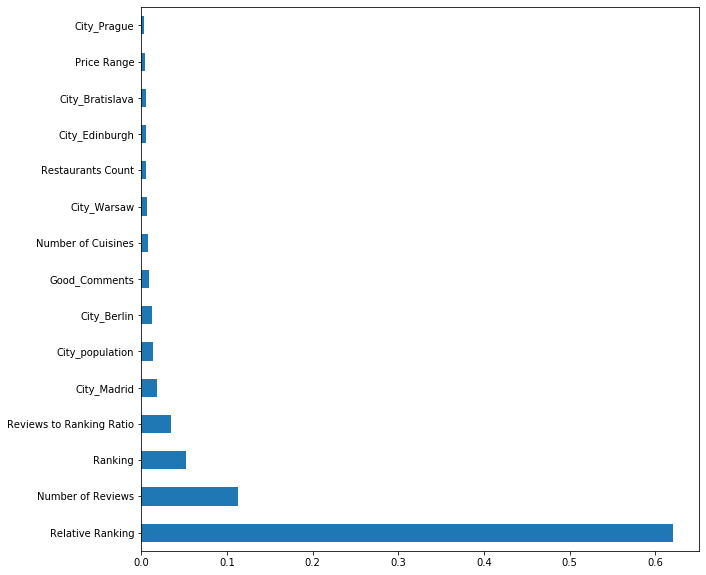

In [79]:
# RandomForestRegressor has the ability to display the most important features for the model
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

Compare the predicted values (y_pred) with the real ones (y_test), and see how much they differ on average

The metric is called the Mean Absolute Error (MAE) and shows the average deviation of the predicted values from the actual ones.

In [80]:
# Mean Absolute Error (MAE) estimation.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20501187499999998


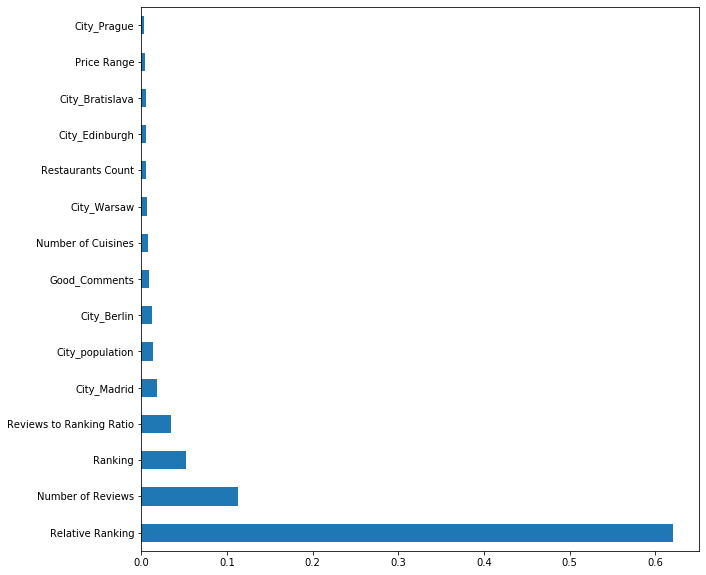

In [81]:
# Evaluating the importance of variables for the forecast.
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

## 6. Submission

In [82]:
# Checking the data ones again
test_data.info()
test_data.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Columns: 174 entries, Ranking to Date_Difference
dtypes: float64(6), int64(7), uint8(161)
memory usage: 2.6 MB


,Ranking,Price Range,Number of Reviews,Rating,Restaurants Count,Capital_City,Сity_population,City_Amsterdam,City_Athens,City_Barcelona,...,wine bar,xinjiang,yunnan,Relative Ranking,Price Range NAN,Number of Reviews NAN,Reviews to Ranking Ratio,Good_Comments,Bad_Comments,Date_Difference
7161,6232.0,2,10.0,0.0,11114,1.0,3223,0,0,0,...,0,0,0,0.560734,1,0,0.001605,1,0,0
8128,11408.0,2,4.0,0.0,17075,1.0,2206,0,0,0,...,0,0,0,0.668111,1,0,0.000351,0,0,0
5000,492.0,2,920.0,0.0,19873,1.0,8908,0,0,0,...,0,0,0,0.024757,0,0,1.869919,2,0,0
180,789.0,2,540.0,0.0,11114,1.0,3223,0,0,0,...,0,0,0,0.070992,0,0,0.684411,0,0,0
6689,2552.0,1,42.0,0.0,19873,1.0,8908,0,0,0,...,0,0,0,0.128415,0,0,0.016458,0,0,0
2452,4080.0,2,170.0,0.0,19873,1.0,8908,0,0,0,...,0,0,0,0.205304,0,0,0.041667,2,0,0
6573,13695.0,2,64.0,0.0,19873,1.0,8908,0,0,0,...,0,0,0,0.689126,0,0,0.004673,2,0,0
7885,610.0,2,439.0,0.0,9472,0.0,1620,0,0,1,...,1,0,0,0.064400,0,0,0.719672,2,0,0
3996,1728.0,2,2.0,0.0,2982,1.0,961,0,0,0,...,0,0,0,0.579477,1,0,0.001157,0,0,0
6938,1352.0,2,3.0,0.0,1864,0.0,415,0,0,0,...,0,0,0,0.725322,1,0,0.002219,0,0,0


In [83]:
# Dropping Rating column
test_data = test_data.drop(['Rating'], axis=1)

In [84]:
# Checking the data
sample_submission

,id,cuisine
0,35203,italian
1,17600,italian
2,35200,italian
3,17602,italian
4,17605,italian
...,...,...
9939,46537,italian
9940,30854,italian
9941,15430,italian
9942,46530,italian


In [ ]:
# Predicting the rating in a test sample
predict_submission = np.array([rating_correction(x) for x in model.predict(test_data)])

In [ ]:
# Checking the data
predict_submission

In [ ]:
# Result submission
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.sample(10)

## 7. Recap & Conclusions

The actions taken:

- We initialized necessary libraries, set visualization conditions and loaded the dataset.
- We analyzed the features, identified the target variable, looked at external sources, and suggested which features we can rely on for feature engineering.
- We checked each variable, filled the NANs, checked the frequency distributions and created several new features.


The most valuable agents for reducing MAE:

- Relative rank feature;
- Number of Reviews;
- Rating correction function;
- City Population;
- Reviews to ranking ratio;
- Restaurants Count.

### P.S. 
Below is the model which were send by our Mentor , regarding to that model the results of MAE is different at the time when we using same data. I could not fugureout why its showing so big difference, maybe we still have to learn a lot... But that makes me even more cuorios to learn, search and discover the analise and tools for that.

In [87]:
def fit_estimate(data, random_state=None):
    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
    X = data.drop(['Rating'], axis = 1)
    y = data['Rating']
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
    # Для тестирования мы будем использовать 25% от исходного датасета.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
    # Создаём модель
    regr = RandomForestRegressor(n_estimators=100, random_state=random_state, n_jobs=-1)
    # Обучаем модель на тестовом наборе данных
    regr.fit(X_train, y_train)
    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
    y_pred = regr.predict(X_test)
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
    print('MAE reg:', metrics.mean_absolute_error(y_test, y_pred))
    print('MAE reg round:', metrics.mean_absolute_error(y_test, np.round(y_pred * 2) / 2))
    
    # Попробуем классификацию:
    le = LabelEncoder()
    le.fit(y_train)
    
    classif = RandomForestClassifier(n_estimators=100, random_state=random_state, n_jobs=-1)
    classif.fit(X_train, le.transform(y_train))
    y_pred = classif.predict(X_test)
    print('MAE classif:', metrics.mean_absolute_error(y_test, le.inverse_transform(y_pred)))    

In [88]:
fit_estimate(df_preproc.dropna(), random_state=322)

MAE reg: 0.1682584
MAE reg round: 0.1446
MAE classif: 0.16524
